# Laboratorio 03
## U-net y filtros anisotrópicos
- Ricardo Mendez 21289
- Sara Echeverría 21371
- Melissa Pérez 21385
Repositorio: https://github.com/MelissaPerez09/Lab04-CC3102

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from Anisotropic import anisodiff

In [2]:
#load images
imagenes_paths = glob.glob("./img/*.jpg")

imagenes = []
target_size = (256, 256)

for path in imagenes_paths:
    img = Image.open(path).convert("L")
    img = img.resize(target_size)
    imagenes.append(np.array(img))

stack = np.stack(imagenes)

In [3]:
print(stack.shape)

(25, 256, 256)


In [4]:
# difuse the image
img_diffused = anisodiff(stack, niter=15, kappa=30, gamma=0.2, option=1)

/Users/melissa/Desktop/UVG/2025/vc/Lab04-CC3102/src/Anisotropic.py:65: UserWarning: Only grayscale images allowed, converting to 2D matrix
  warnings.warn("Only grayscale images allowed, converting to 2D matrix")


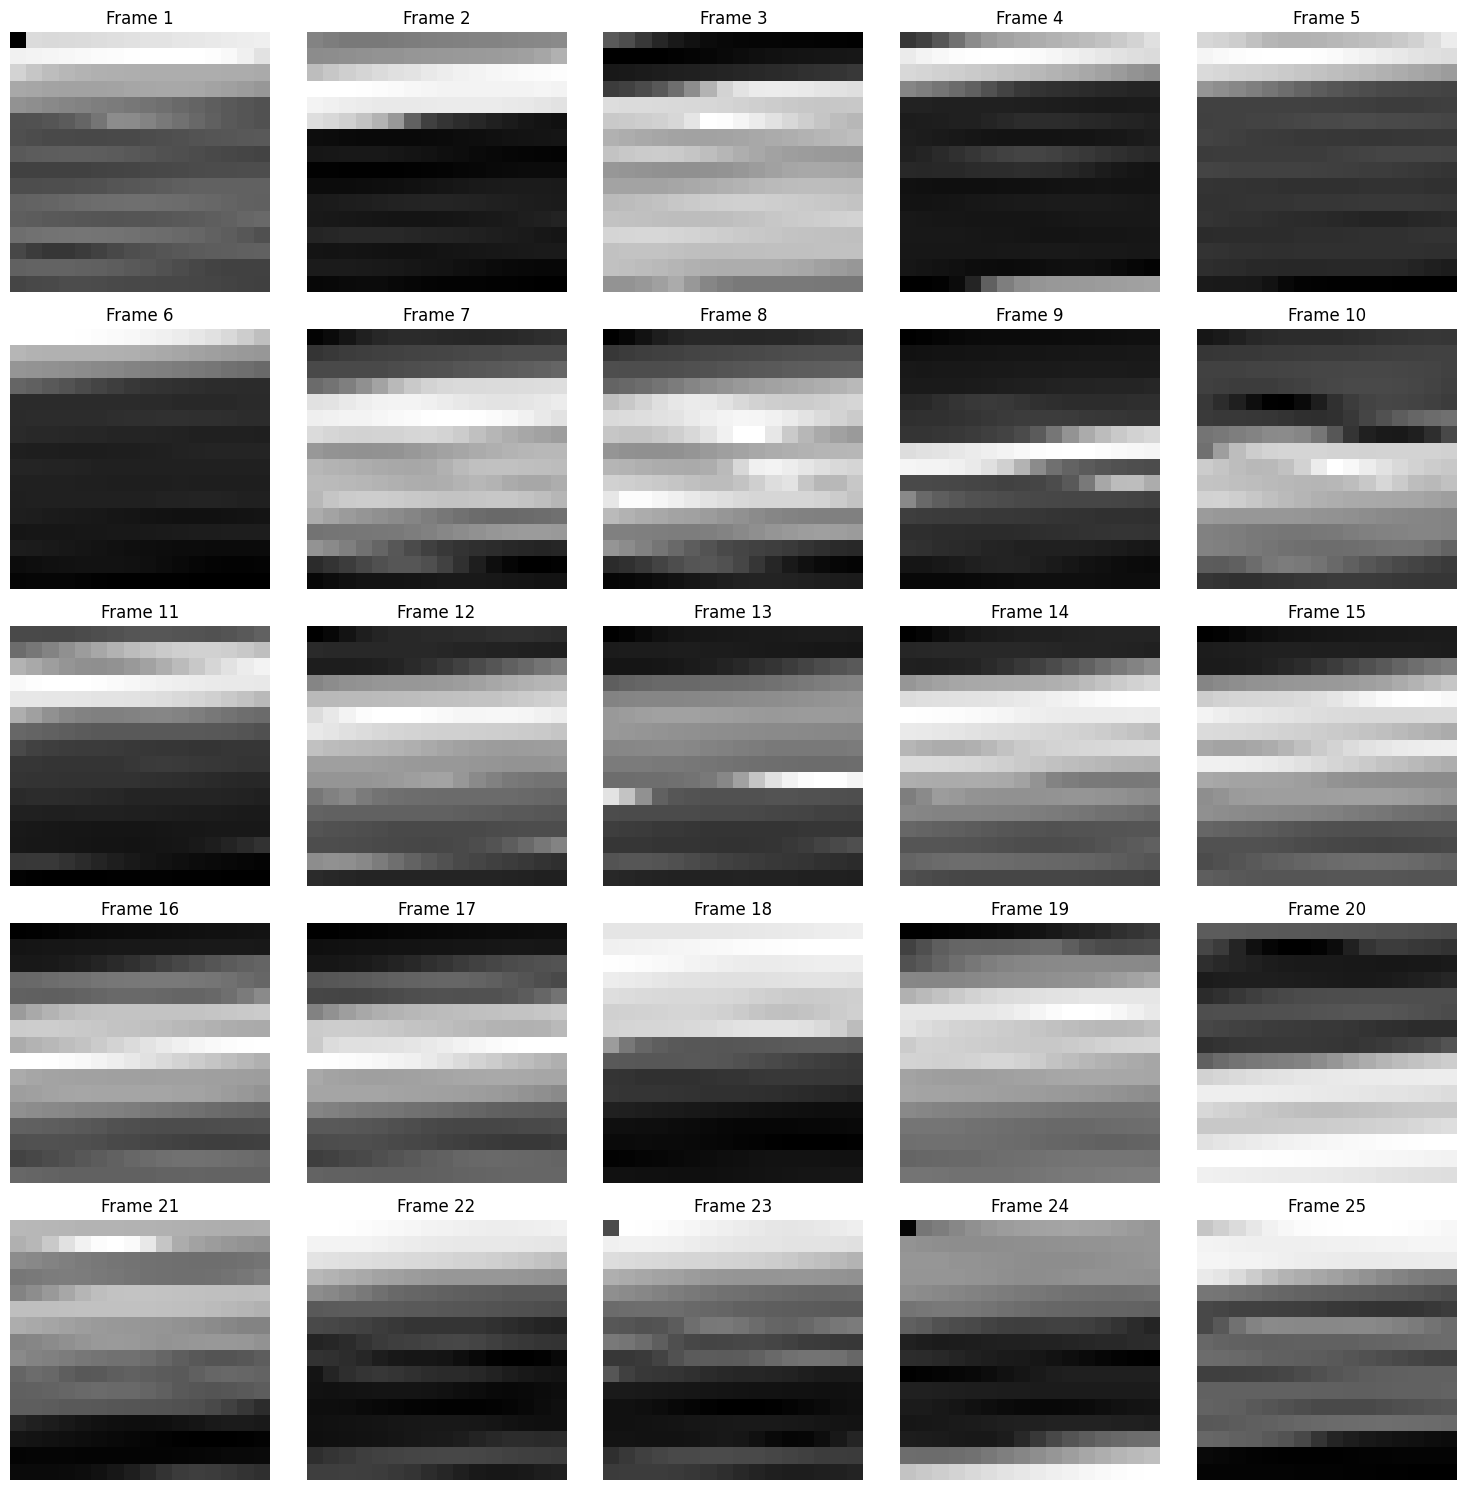

In [5]:
#muestra por frames la imagen difusa
num_frames = img_diffused.shape[0]
cols = 5
rows = (num_frames + cols - 1) // cols

plt.figure(figsize=(15, 3 * rows))

for i in range(num_frames):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_diffused[i].reshape(16, 16), cmap='gray')
    plt.axis('off')
    plt.title(f"Frame {i+1}")

plt.tight_layout()
plt.show()